# Simple analytics

In [134]:
from aux import connect_to_db
from sql_queries import (
    AVG_POINTS_BY_PLAYER_QUERY, COUNT_GAMES_PER_TOURNAMENT_QUERY, 
    WINS_PER_SURFACE_QUERY, CURRENT_PRE_MATCH_ATP_RANKINGS_QUERY,
    LAST_X_MATCHES
)

ImportError: cannot import name 'LAST_X_MATCHES' from 'sql_queries' (/workspaces/smart-tennis-bet/sql_queries.py)

In [2]:
def execute_and_print_query(query, row_limit=10):
    conn = connect_to_db()
    if conn is None:
        return

    try:
        cur = conn.cursor()
        cur.execute(query)

        # Fetch all results
        results = cur.fetchall()

        # Print top rows up to the specified limit
        for idx, row in enumerate(results[:row_limit]):
            print(f"Row {idx + 1}: {row}")

        cur.close()
        conn.close()
        print("Database connection closed.")
    except Exception as e:
        print(f"Error during DB operation: {e}")

In [3]:
execute_and_print_query(AVG_POINTS_BY_PLAYER_QUERY, row_limit=5)

Error connecting to database: could not translate host name "db" to address: Name or service not known



In [5]:
execute_and_print_query(COUNT_GAMES_PER_TOURNAMENT_QUERY, row_limit=10)

Connection to database established.
Row 1: (32, 'French Open', 127)
Row 2: (39, 'Wimbledon', 127)
Row 3: (5, 'Australian Open', 127)
Row 4: (51, 'US Open', 127)
Row 5: (28, 'Mutua Madrid Open', 95)
Row 6: (29, "Internazionali BNL d'Italia", 95)
Row 7: (20, 'Miami Open', 95)
Row 8: (19, 'BNP Paribas Open', 95)
Row 9: (49, 'Western & Southern Financial Group Masters', 55)
Row 10: (48, 'Canadian Open', 55)
Database connection closed.


In [6]:
execute_and_print_query(CURRENT_PRE_MATCH_ATP_RANKINGS_QUERY, row_limit=10)

Connection to database established.
Row 1: (53, 'Sinner J.', 1, 9360)
Row 2: (60, 'Djokovic N.', 2, 7460)
Row 3: (86, 'Alcaraz C.', 3, 7360)
Row 4: (85, 'Zverev A.', 4, 7035)
Row 5: (63, 'Medvedev D.', 5, 6275)
Row 6: (30, 'Rublev A.', 6, 4805)
Row 7: (76, 'Hurkacz H.', 7, 4055)
Row 8: (82, 'Ruud C.', 8, 3855)
Row 9: (5, 'Dimitrov G.', 9, 3655)
Row 10: (75, 'De Minaur A.', 10, 3435)
Database connection closed.


In [7]:
execute_and_print_query(WINS_PER_SURFACE_QUERY, row_limit=10)

Connection to database established.
Row 1: (53, 'Sinner J.', 'Hard', 36)
Row 2: (30, 'Rublev A.', 'Hard', 26)
Row 3: (11, 'Thompson J.', 'Hard', 25)
Row 4: (5, 'Dimitrov G.', 'Hard', 25)
Row 5: (56, 'Baez S.', 'Clay', 23)
Row 6: (85, 'Zverev A.', 'Hard', 23)
Row 7: (82, 'Ruud C.', 'Clay', 22)
Row 8: (63, 'Medvedev D.', 'Hard', 22)
Row 9: (101, 'Darderi L.', 'Clay', 21)
Row 10: (29, 'Tiafoe F.', 'Hard', 21)
Database connection closed.


In [5]:
execute_and_print_query(LAST_X_MATCHES, row_limit=10)

Error connecting to database: could not translate host name "db" to address: Name or service not known



In [16]:
execute_and_print_query("""
                        SELECT
                        --m.match_id,
                        --m.tournament_id,
                        m.date,
                        m.round,
                        --m.best_of,
                        w.name AS winner_name,
                        l.name AS loser_name,
                        m.winner_rank,
                        m.loser_rank,
                        m.winner_pts,
                        m.loser_pts,
                        m.winner_sets,
                        m.loser_sets,
                        m.comments
                        FROM matches m
                        JOIN players w ON m.winner_id = w.player_id
                        JOIN players l ON m.loser_id = l.player_id
                        ORDER BY m.date DESC
                        LIMIT 10
                        """, row_limit=5)

Connection to database established.
Row 1: (datetime.date(2024, 9, 8), 'The Final', 'Sinner J.', 'Fritz T.', 1, 12, 9360, 3120, 3, 0, 'Completed')
Row 2: (datetime.date(2024, 9, 7), 'Semifinals', 'Fritz T.', 'Tiafoe F.', 12, 20, 3120, 2120, 3, 2, 'Completed')
Row 3: (datetime.date(2024, 9, 6), 'Semifinals', 'Sinner J.', 'Draper J.', 1, 25, 9360, 1695, 3, 0, 'Completed')
Row 4: (datetime.date(2024, 9, 5), 'Quarterfinals', 'Sinner J.', 'Medvedev D.', 1, 5, 9360, 6275, 3, 1, 'Completed')
Row 5: (datetime.date(2024, 9, 4), 'Quarterfinals', 'Tiafoe F.', 'Dimitrov G.', 20, 9, 2120, 3655, 2, 1, 'Retired')
Database connection closed.


# 2 Part Quick Checks

In [2]:
from etl import extract_data_from_excel
from enum import Enum, auto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_running_total_with_initial_value(df, initial_value=100, title='Running Total Over Bets'):
    """
    Plots the running total with the initial value represented as a dashed line.
    
    Parameters:
    - df: pandas DataFrame containing the 'running_total' column.
    - initial_value: float, the initial value to be represented as a dashed line (default is 100).
    - title: str, title of the plot (default is 'Running Total Over Bets').
    """
    # Create a copy of the original DataFrame and extract the 'running_total' series
    df_s = df.copy()
    df_s = df_s["running_total"]

    # Create a new Series that includes the initial value at the start
    df_c = pd.Series([initial_value] + df_s.tolist())

    # Plot the running total with markers
    plt.figure(figsize=(30, 8))
    sns.lineplot(data=df_c, marker='o', label='Running Total')

    # Add a horizontal dashed line for the initial value
    plt.axhline(y=initial_value, color='red', linestyle='--', label='Initial Value')

    # Customize the plot
    plt.title(title)
    plt.xlabel('Bet Number')
    plt.ylabel('Running Total')
    #plt.xticks(range(len(df_c)))  # Set x-ticks to match the bet numbers
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

In [4]:
URL = "http://tennis-data.co.uk/2024/20234.xlsx"
df = extract_data_from_excel(URL)
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail(3)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
2576,60,Basel,Swiss Indoors,2024-10-26,ATP500,Indoor,Hard,Semifinals,3,Shelton B.,...,0.0,Completed,1.91,1.91,2.05,1.86,2.05,2.01,1.95,1.84
2577,60,Basel,Swiss Indoors,2024-10-27,ATP500,Indoor,Hard,The Final,3,Mpetshi G.,...,0.0,Completed,2.75,1.44,2.85,1.49,2.95,1.50,2.76,1.44
2578,61,Vienna,Vienna Open,2024-10-27,ATP500,Indoor,Hard,The Final,3,Draper J.,...,0.0,Completed,1.67,2.20,1.69,2.30,1.69,2.31,1.65,2.21


In [5]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [10]:
df["Winner"]

0                 Popyrin A.
1              Shevchenko A.
2              Ruusuvuori E.
3       Van De Zandschulp B.
4                   Kotov P.
                ...         
2574              Mpetshi G.
2575            Khachanov K.
2576              Shelton B.
2577              Mpetshi G.
2578               Draper J.
Name: Winner, Length: 2579, dtype: object

In [6]:
from src.simulator import simulate_bets, simulate_by_player

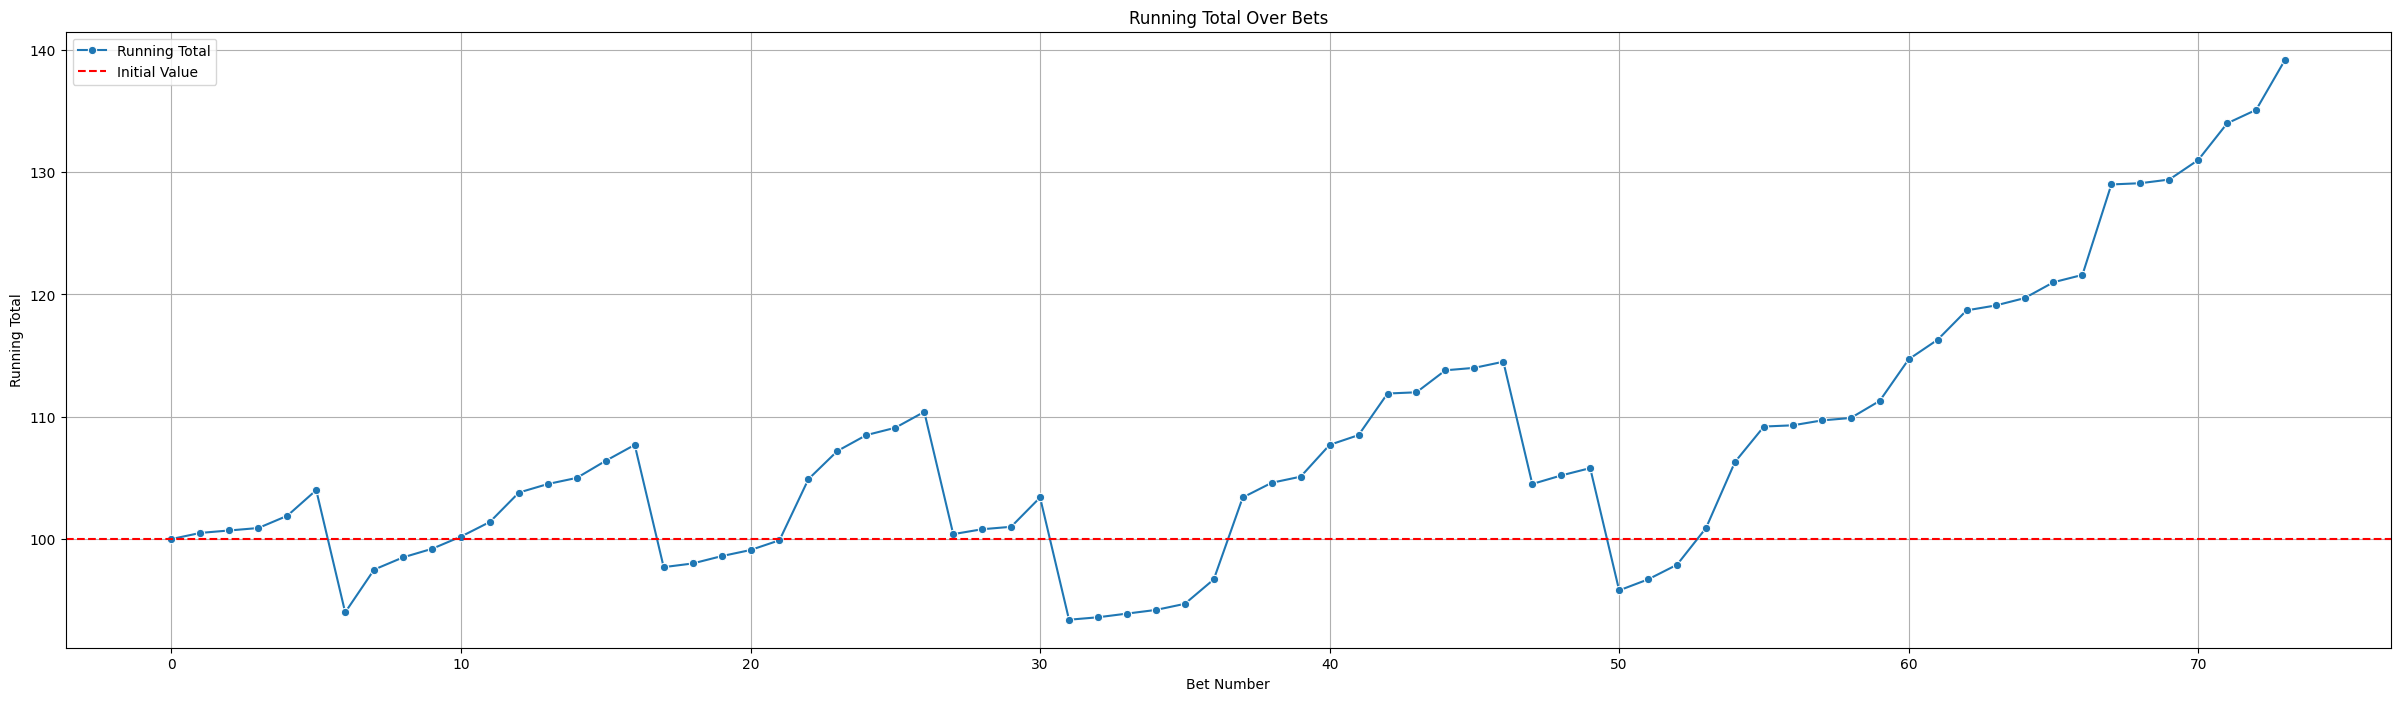

In [7]:
# Strategy 1
INITIAL_VALUE = 100
BET_AMOUNT = 10
player = "Sinner J."

df_player = df[
    (df["Winner"] == player) | (df["Loser"] == player)
]

res = simulate_bets(df_player, INITIAL_VALUE, BET_AMOUNT)
df_r = pd.DataFrame.from_dict(res)
plot_running_total_with_initial_value(df_r)

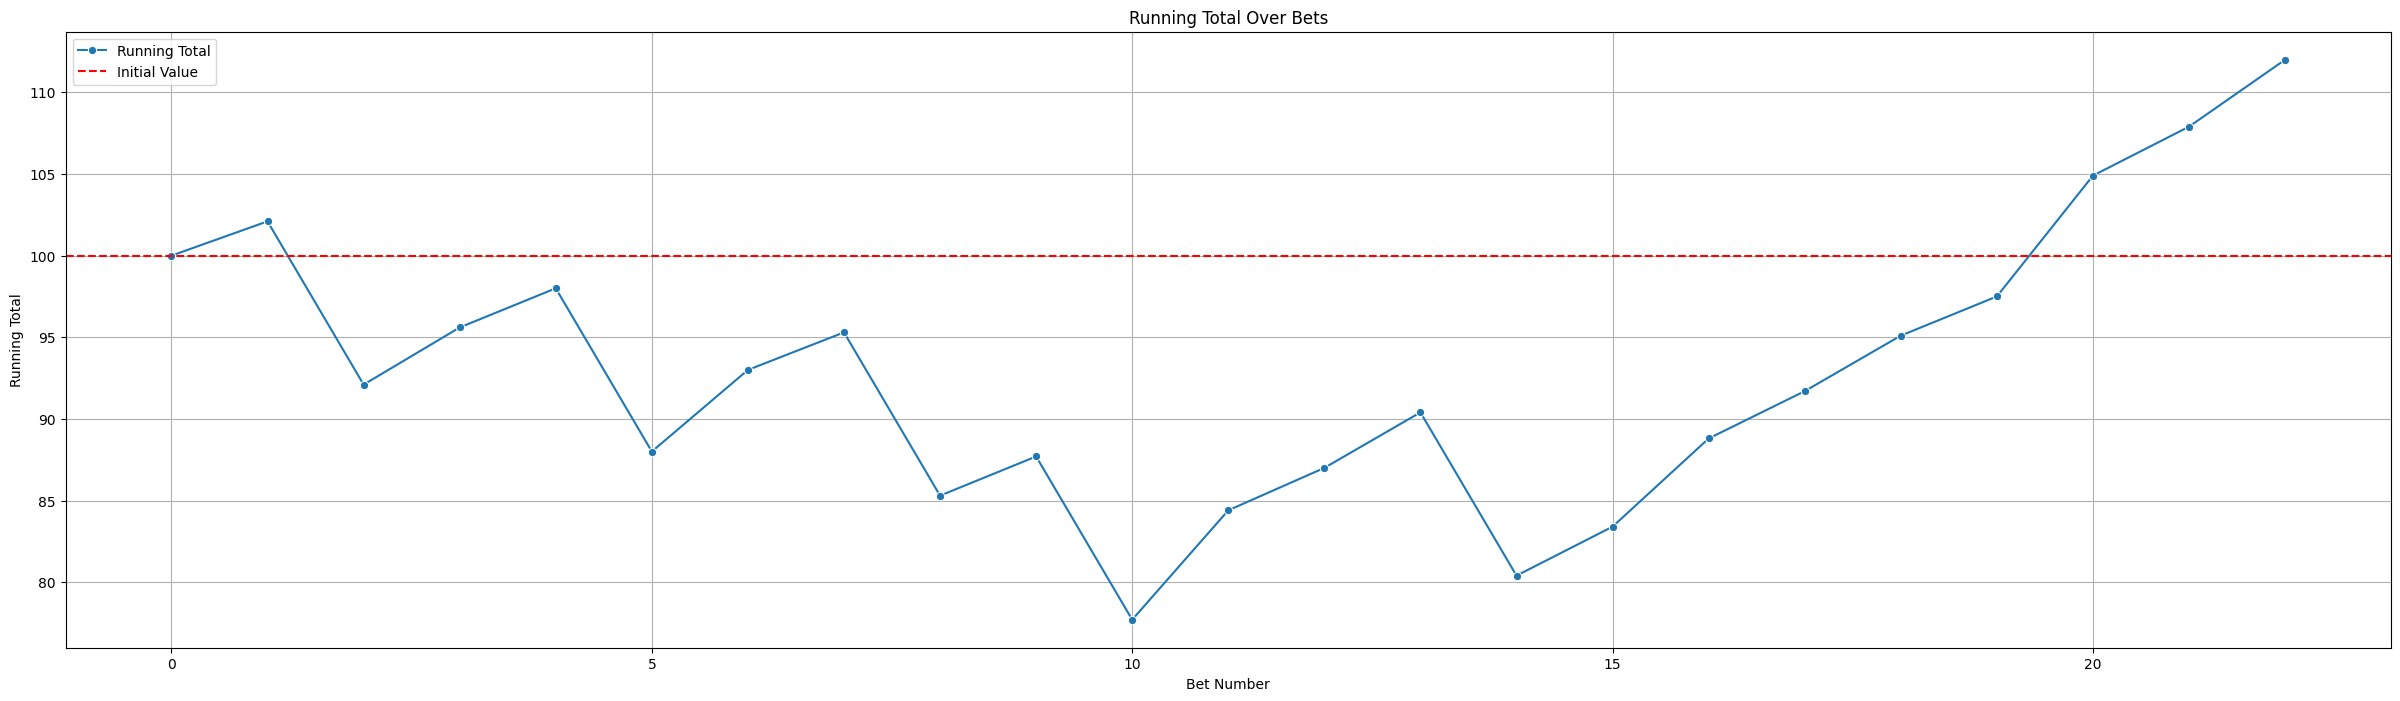

In [12]:
# Strategy 2 - Same as 1 but with the condition of not possible when less than 1.2
res = simulate_bets(df_player, INITIAL_VALUE, BET_AMOUNT, strategy=bet_on_smaller_odd_criteria)
df_r = pd.DataFrame.from_dict(res)
plot_running_total_with_initial_value(df_r)

In [11]:
summary_df = simulate_by_player(df, INITIAL_VALUE, BET_AMOUNT)

In [12]:
summary_df.sort_values("Net Gain/Loss ($)",ascending=False)

,Player,Number of Bet Won,Number of Bet Lost,Win Percentage (%),Final Amount ($),Net Gain/Loss ($),Net Gain/Loss Percentage (%),Number of Played Games
118,Fucsovics M.,23,4,85.19,173.9,73.9,73.9,27
54,Baez S.,42,10,80.77,161.7,61.7,61.7,52
6,Safiullin R.,28,9,75.68,151.6,51.6,51.6,37
3,Van De Zandschulp B.,28,8,77.78,151.1,51.1,51.1,36
64,Hurkacz H.,41,11,78.85,150.4,50.4,50.4,52
...,...,...,...,...,...,...,...,...
67,Auger-Aliassime F.,29,19,60.42,3.6,-96.4,-96.4,48
0,Popyrin A.,21,20,51.22,-4.2,-104.2,-104.2,41
16,Fils A.,31,25,55.36,-6.1,-106.1,-106.1,56
29,Rublev A.,42,22,65.62,-6.2,-106.2,-106.2,64


In [147]:
# Create a summary DataFrame
summary_df = pd.DataFrame(results_summary)
summary_df.sort_values("Net Gain/Loss ($)",ascending=False)

,Player,Number of Bet Won,Number of Bet Lost,Win Percentage (%),Final Amount ($),Net Gain/Loss ($),Net Gain/Loss Percentage (%),Number of Played Games
14,Bautista Agut R.,29,6,82.86,186.8,86.8,86.8,35
6,Safiullin R.,28,8,77.78,161.6,61.6,61.6,36
51,Baez S.,40,10,80.00,158.1,58.1,58.1,50
119,Fucsovics M.,20,4,83.33,157.8,57.8,57.8,24
65,Hurkacz H.,41,11,78.85,150.4,50.4,50.4,52
...,...,...,...,...,...,...,...,...
22,Thompson J.,33,23,58.93,9.5,-90.5,-90.5,56
36,Muller A.,17,17,50.00,6.6,-93.4,-93.4,34
16,Fils A.,28,24,53.85,-8.3,-108.3,-108.3,52
0,Popyrin A.,20,20,50.00,-11.5,-111.5,-111.5,40


In [148]:
summary_df["Net Gain/Loss ($)"].sum()

np.float64(-1714.8)

<Axes: xlabel='Final Amount ($)', ylabel='Density'>

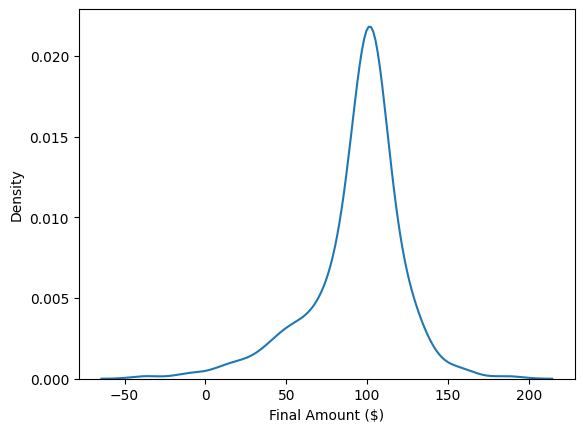

In [149]:
sns.kdeplot(summary_df['Final Amount ($)'])

<Axes: xlabel='Number of Played Games', ylabel='Final Amount ($)'>

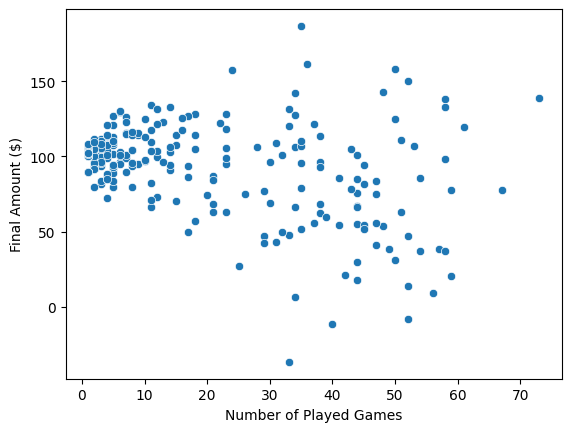

In [154]:
sns.scatterplot(x=summary_df["Number of Played Games"], y=summary_df["Final Amount ($)"])

<Axes: xlabel='Number of Bet Won', ylabel='Final Amount ($)'>

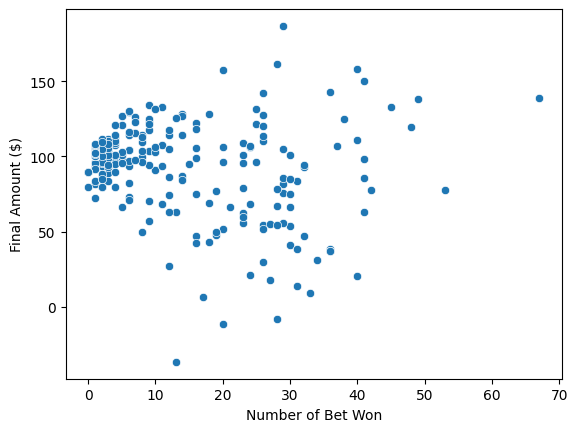

In [153]:
sns.scatterplot(x=summary_df["Number of Bet Won"], y=summary_df["Final Amount ($)"])

<Axes: xlabel='Number of Bet Won', ylabel='Number of Played Games'>

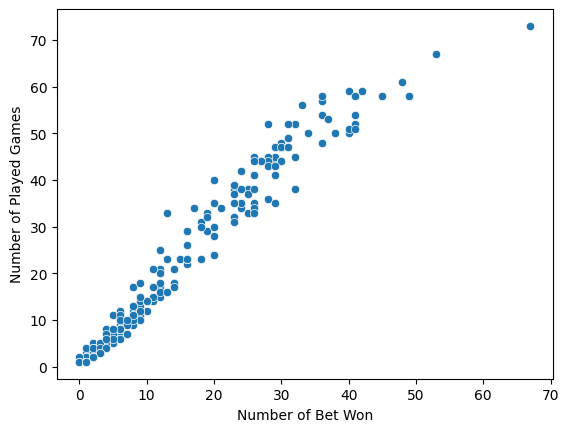

In [155]:
sns.scatterplot(x=summary_df["Number of Bet Won"], y=summary_df["Number of Played Games"])

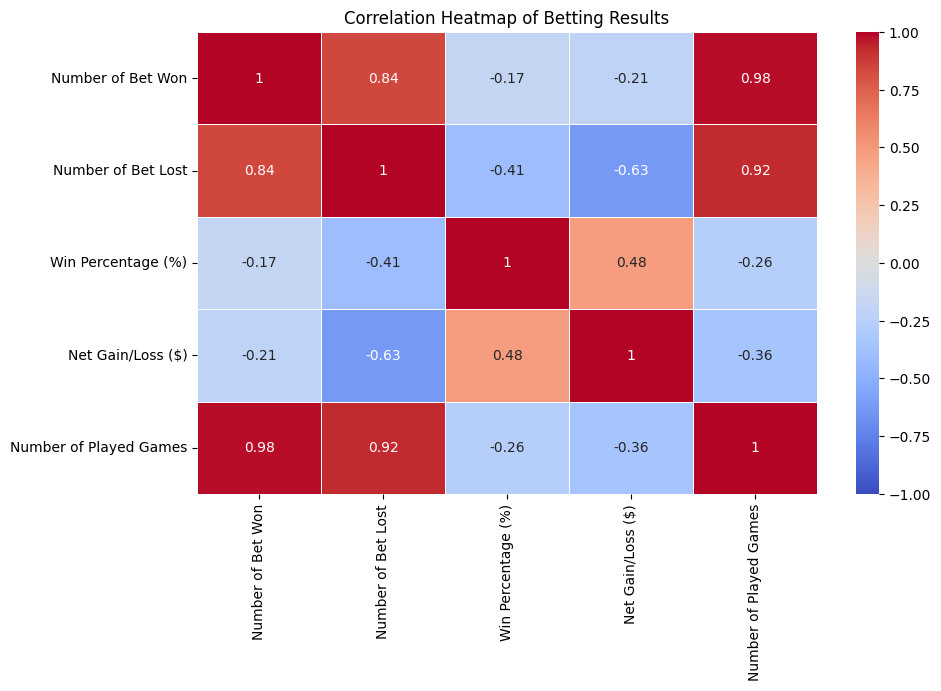

In [151]:
# Set the index to the Player for better visualization
summary_df.set_index("Player", inplace=True)

# Calculate the correlation matrix
correlation_matrix = summary_df.drop(columns=["Final Amount ($)", "Net Gain/Loss Percentage (%)"]).corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
             annot=True,  # Annotate cells with their numeric value
             cmap='coolwarm',  # Color map for heatmap
             cbar=True,  # Show color bar
             linewidths=.5,  # Lines between cells
             vmin=-1, vmax=1)  # Set color scale from -1 to 1

# Set title
plt.title('Correlation Heatmap of Betting Results')

# Show the plot
plt.show()